In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1


In [3]:
dataset.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
count,223.000000,221.000000,221.000000,165.000000,165.000000,165.000000,165.000000,164.000000,219.000000,222.000000,215.000000,106.000000,112.000000,157.000000,223.000000
mean,61.573991,8.556109,226.060633,6.123636,1.208485,0.598182,0.053333,0.014634,89.400000,52.247748,45.413953,95.018868,83.107143,373.777070,0.641256
std,18.382391,4.753326,106.291297,4.067418,0.855071,0.404619,0.137279,0.040312,92.509815,52.209349,44.582705,97.872705,135.513661,191.488388,0.480711
min,0.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,10.000000,34.000000,10.000000,98.000000,0.000000
25%,49.000000,5.100000,157.000000,3.500000,0.600000,0.300000,0.000000,0.000000,21.800000,27.000000,22.000000,58.250000,25.000000,241.000000,0.000000
50%,64.000000,7.300000,199.000000,5.100000,1.000000,0.500000,0.000000,0.000000,53.100000,36.000000,32.000000,73.000000,43.000000,321.000000,1.000000
75%,76.000000,10.800000,272.000000,7.600000,1.500000,0.800000,0.100000,0.000000,129.950000,59.750000,47.000000,96.250000,84.000000,444.000000,1.000000
max,98.000000,29.200000,620.000000,24.300000,7.200000,3.200000,1.300000,0.300000,425.000000,550.000000,275.000000,838.000000,839.000000,1183.000000,1.000000


In [4]:
dataset.shape

(223, 16)

In [5]:
sum(dataset.duplicated())

4

In [6]:
dataset.isnull().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     58
Lymphocytes     58
Monocytes       58
Eosinophils     58
Basophils       59
CRP              4
AST              1
ALT              8
ALP            117
GGT            111
LDH             66
Class            0
dtype: int64

In [7]:
dataset.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1


In [8]:
dataset.isnull()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
219,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,False
220,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
221,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [9]:
dataset.isnull().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     58
Lymphocytes     58
Monocytes       58
Eosinophils     58
Basophils       59
CRP              4
AST              1
ALT              8
ALP            117
GGT            111
LDH             66
Class            0
dtype: int64

In [10]:
dataset.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
count,223.000000,221.000000,221.000000,165.000000,165.000000,165.000000,165.000000,164.000000,219.000000,222.000000,215.000000,106.000000,112.000000,157.000000,223.000000
mean,61.573991,8.556109,226.060633,6.123636,1.208485,0.598182,0.053333,0.014634,89.400000,52.247748,45.413953,95.018868,83.107143,373.777070,0.641256
std,18.382391,4.753326,106.291297,4.067418,0.855071,0.404619,0.137279,0.040312,92.509815,52.209349,44.582705,97.872705,135.513661,191.488388,0.480711
min,0.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,10.000000,34.000000,10.000000,98.000000,0.000000
25%,49.000000,5.100000,157.000000,3.500000,0.600000,0.300000,0.000000,0.000000,21.800000,27.000000,22.000000,58.250000,25.000000,241.000000,0.000000
50%,64.000000,7.300000,199.000000,5.100000,1.000000,0.500000,0.000000,0.000000,53.100000,36.000000,32.000000,73.000000,43.000000,321.000000,1.000000
75%,76.000000,10.800000,272.000000,7.600000,1.500000,0.800000,0.100000,0.000000,129.950000,59.750000,47.000000,96.250000,84.000000,444.000000,1.000000
max,98.000000,29.200000,620.000000,24.300000,7.200000,3.200000,1.300000,0.300000,425.000000,550.000000,275.000000,838.000000,839.000000,1183.000000,1.000000


In [11]:
x=dataset
x

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,NaN,NaN,NaN,NaN,NaN,6.3,31.0,16.0,NaN,NaN,NaN,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,M,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,NaN,455.0,1
219,F,72,10.1,245.0,NaN,NaN,NaN,NaN,NaN,49.6,28.0,22.0,NaN,NaN,328.0,0
220,F,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,NaN,NaN,NaN,0
221,M,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,NaN,NaN,369.0,1


In [12]:
x.isnull().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     58
Lymphocytes     58
Monocytes       58
Eosinophils     58
Basophils       59
CRP              4
AST              1
ALT              8
ALP            117
GGT            111
LDH             66
Class            0
dtype: int64

In [13]:
y=x.fillna(method="pad")
y

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,13.9,1.0,0.8,0.0,0.0,6.3,31.0,16.0,80.0,16.0,235.0,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,M,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,25.0,455.0,1
219,F,72,10.1,245.0,6.2,0.3,0.3,0.1,0.0,49.6,28.0,22.0,92.0,25.0,328.0,0
220,F,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,92.0,25.0,328.0,0
221,M,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,92.0,25.0,369.0,1


In [14]:
y.isnull().sum()

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
ALP            0
GGT            0
LDH            0
Class          0
dtype: int64

In [15]:
y.dtypes


GENDER          object
AGE              int64
WBC            float64
Platelets      float64
Neutrophils    float64
Lymphocytes    float64
Monocytes      float64
Eosinophils    float64
Basophils      float64
CRP            float64
AST            float64
ALT            float64
ALP            float64
GGT            float64
LDH            float64
Class            int64
dtype: object

In [16]:
y

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,F,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,M,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,F,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,M,85,10.6,227.0,13.9,1.0,0.8,0.0,0.0,6.3,31.0,16.0,80.0,16.0,235.0,0
4,F,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,M,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,25.0,455.0,1
219,F,72,10.1,245.0,6.2,0.3,0.3,0.1,0.0,49.6,28.0,22.0,92.0,25.0,328.0,0
220,F,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,92.0,25.0,328.0,0
221,M,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,92.0,25.0,369.0,1


In [17]:
y.shape

(223, 16)

In [18]:
le=LabelEncoder()
y['GENDER']=le.fit_transform(y['GENDER'])
y

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,0,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,1,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,0,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,1,85,10.6,227.0,13.9,1.0,0.8,0.0,0.0,6.3,31.0,16.0,80.0,16.0,235.0,0
4,0,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,25.0,455.0,1
219,0,72,10.1,245.0,6.2,0.3,0.3,0.1,0.0,49.6,28.0,22.0,92.0,25.0,328.0,0
220,0,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,92.0,25.0,328.0,0
221,1,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,92.0,25.0,369.0,1


In [19]:
y.dtypes


GENDER           int32
AGE              int64
WBC            float64
Platelets      float64
Neutrophils    float64
Lymphocytes    float64
Monocytes      float64
Eosinophils    float64
Basophils      float64
CRP            float64
AST            float64
ALT            float64
ALP            float64
GGT            float64
LDH            float64
Class            int64
dtype: object

In [20]:
y.isnull().sum()


GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
ALP            0
GGT            0
LDH            0
Class          0
dtype: int64

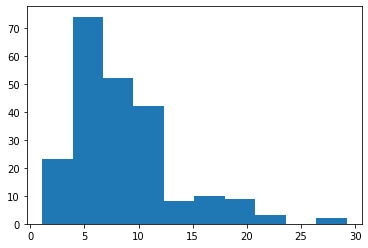

In [21]:
plt.hist(y["WBC"])
plt.show()

In [22]:
y

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,Class
0,0,70,4.9,145.0,4.0,0.7,0.3,0.0,0.0,87.9,68.0,41.0,89.0,63.0,606.0,1
1,1,61,11.3,166.0,10.7,0.5,0.1,0.0,0.0,174.3,118.0,95.0,59.0,77.0,808.0,1
2,0,70,15.8,202.0,13.9,1.0,0.8,0.0,0.0,43.8,20.0,26.0,80.0,16.0,235.0,0
3,1,85,10.6,227.0,13.9,1.0,0.8,0.0,0.0,6.3,31.0,16.0,80.0,16.0,235.0,0
4,0,89,4.5,170.0,3.8,0.5,0.2,0.0,0.0,133.6,57.0,17.0,81.0,19.0,626.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,57,6.8,172.0,6.2,0.3,0.3,0.1,0.0,27.6,83.0,137.0,92.0,25.0,455.0,1
219,0,72,10.1,245.0,6.2,0.3,0.3,0.1,0.0,49.6,28.0,22.0,92.0,25.0,328.0,0
220,0,79,6.4,170.0,5.0,0.6,0.7,0.0,0.0,2.0,70.0,45.0,92.0,25.0,328.0,0
221,1,80,11.0,285.0,9.3,0.6,1.1,0.0,0.0,135.1,34.0,20.0,92.0,25.0,369.0,1


In [23]:
y.shape

(223, 16)

In [24]:
a=y.drop(columns='Class')
b=y['Class']

In [25]:
a.shape

(223, 15)

In [26]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.20,random_state=12)


In [27]:
a_train.shape

(178, 15)

In [28]:
a_test.shape

(45, 15)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [30]:
model1= LogisticRegression()
model1.fit(a_train,b_train)

LogisticRegression()

In [31]:
pre=model1.predict(a_test)

In [32]:
print(accuracy_score(b_test,pre))

0.7111111111111111


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model2=RandomForestClassifier(random_state=12)
model2.fit(a_train,b_train)

RandomForestClassifier(random_state=12)

In [35]:
pre1=model2.predict(a_test)
print(accuracy_score(b_test,pre1))

0.8444444444444444


In [37]:
import pickle

In [38]:
model2

RandomForestClassifier(random_state=12)

In [39]:
pickle.dump(model2,open("model2.pkl","wb"))

In [40]:
loaded_model=pickle.load(open("model2.pkl","rb"))

In [41]:
loaded_model.predict(a_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1], dtype=int64)

In [42]:
model2.predict(a_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1], dtype=int64)